<a href="https://colab.research.google.com/github/gyzo-dev/LE2_Maligalig_MA/blob/main/LE2_Maligalig_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

Initialize Data Set

In [ ]:
data = pd.read_csv ('https://archive.ics.uci.edu/static/public/42/data.csv')
data.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.shape

(214, 11)

In [ ]:
data.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Clean dataset

In [ ]:
data.isnull().sum()*100/data.shape[0]

Id_number        0.0
RI               0.0
Na               0.0
Mg               0.0
Al               0.0
Si               0.0
K                0.0
Ca               0.0
Ba               0.0
Fe               0.0
Type_of_glass    0.0
dtype: float64

In [ ]:
data.loc[data.duplicated()]

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass


In [ ]:
data.columns

Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')

In [ ]:
data[['Type_of_glass']].value_counts()

Type_of_glass
2                76
1                70
7                29
3                17
5                13
6                 9
Name: count, dtype: int64

According to the dataset,

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

Initialize X and Y

In [ ]:
y = data['Type_of_glass']
X = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

MODEL 1 - Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([2, 7, 1, 1, 2, 2, 1, 1, 6, 2, 2, 2, 7, 2, 2, 1, 5, 1, 1, 1, 5, 7,
       1, 7, 2, 1, 7, 1, 2, 1, 2, 2, 1, 2, 1, 7, 1, 2, 1, 1, 2, 5, 1])

<Axes: >

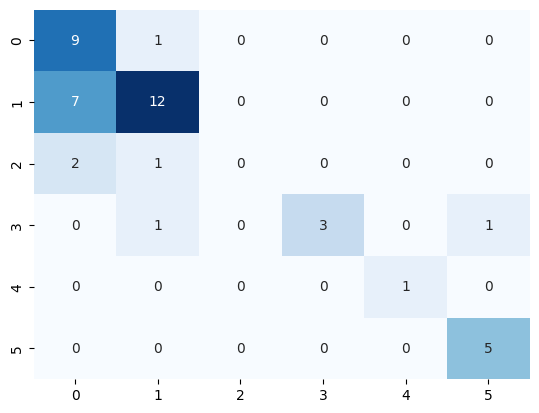

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predict),  annot=True, cmap='Blues', fmt='g', cbar=False)

In [ ]:
print(classification_report(y_test,y_predict, zero_division=1))

              precision    recall  f1-score   support

           1       0.50      0.90      0.64        10
           2       0.80      0.63      0.71        19
           3       1.00      0.00      0.00         3
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.70        43
   macro avg       0.86      0.69      0.67        43
weighted avg       0.78      0.70      0.68        43



MODEL 2 - Random Forest Classifier

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_predict2 = model2.predict(X_test2)

In [ ]:
y_score2 = model2.predict_proba(X_test2)

In [ ]:
y_predict2

array([2, 7, 2, 2, 2, 2, 3, 1, 6, 2, 2, 5, 7, 2, 2, 1, 5, 1, 1, 2, 5, 7,
       1, 7, 2, 1, 7, 1, 2, 1, 2, 2, 1, 1, 1, 7, 3, 1, 2, 1, 2, 5, 1])

<Axes: >

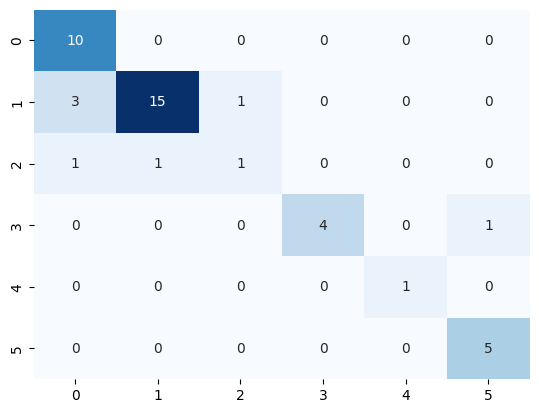

In [ ]:
sns.heatmap(confusion_matrix(y_test2,y_predict2),  annot=True, cmap='Blues', fmt='g', cbar=False)

In [ ]:
print(classification_report(y_test2, y_predict2, zero_division=1))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       0.94      0.79      0.86        19
           3       0.50      0.33      0.40         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.84        43
   macro avg       0.83      0.82      0.81        43
weighted avg       0.85      0.84      0.83        43



In [ ]:
import pickle
import shutil

with open('model_classification1.pkl', 'wb') as f:
    pickle.dump(model, f)

shutil.copy('model_classification1.pkl', '/content/drive/My Drive/ML')

with open('model_classification2.pkl', 'wb') as f:
    pickle.dump(model2, f)

shutil.copy('model_classification2.pkl', '/content/drive/My Drive/ML')

'/content/drive/My Drive/ML/model_classification2.pkl'